## Dataset
A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- sbp	:	systolic blood pressure
- tobacco	:	cumulative tobacco (kg)
- ldl	:	low densiity lipoprotein cholesterol
- adiposity
- famhist	:	family history of heart disease (Present, Absent)
- typea	:	type-A behavior
- obesity
- alcohol	:	current alcohol consumption
- age	:	age at onset
- chd	:	response, coronary heart disease

To read into R:
read.table("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data",
	sep=",",head=T,row.names=1)

### Objective:

Important statistical concepts that we will learn in this notebook are:

- Hypothesis Testing
- One Sample and Two Sample Test
- Chi-Square Test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
chd_df = pd.read_csv("E:\ML_course\practice\S3_Sampling_Distribution_and_Hypothesis_test/chd data.csv")
chd_df = chd_df.set_index(['row.names'],drop= True)
chd_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0


In [3]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


In [4]:
chd_df.chd.value_counts()

chd
0    302
1    160
Name: count, dtype: int64

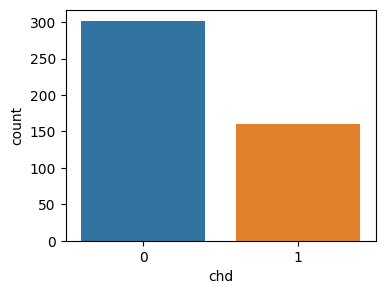

In [5]:
plt.figure(figsize=(4,3))
sn.countplot(data = chd_df,
             x = 'chd');

In [6]:
yes_chd = chd_df[chd_df.chd == 1]
yes_chd.chd.value_counts()

chd
1    160
Name: count, dtype: int64

In [7]:
no_chd = chd_df[chd_df.chd == 0]
no_chd.chd.value_counts()

chd
0    302
Name: count, dtype: int64

### Analysing Tobacco consumption
###### Numerical Variable


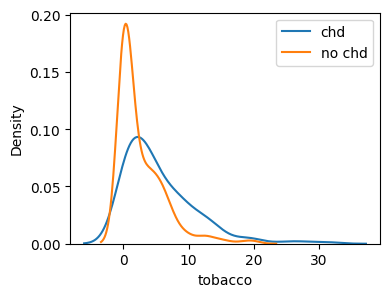

In [8]:
plt.figure(figsize=(4,3))
sn.kdeplot(data = yes_chd , x= 'tobacco', label = "chd")
sn.kdeplot(data = no_chd , x= 'tobacco', label = "no chd")
plt.legend()

In [9]:
yes_chd.tobacco.mean()

5.524875

In [10]:
no_chd.tobacco.mean()

2.6347350993377487

**Null Hypothesis** : High tobacco cunsumption does no effect on chd i.e people who consume tobacco and the people don't cunsume tobacco both are having chd
- H0 : Tobacco_chd = Tobacco_no_chd

**Alternative Hypothesis** : High tobacco cunsumption does effect on chd i.e people who consume tobacco have high chances of having chd than the people who doesn't cumsume tobacco
- H1 : Tobacco_chd != Tobacco_no_chd

**Using Two Sample Test** (independent test)

In [11]:
stats.ttest_ind(yes_chd['tobacco'],
                no_chd['tobacco'])

Ttest_indResult(statistic=6.737983717964519, pvalue=4.815842571605575e-11)

- **Conclusion**  : As p value is very less than alpha value (0.05) so we will reject the Null Hypothesis (HO)
- That is High Tobacco cunsumption can cause CHD

### Analysing Alcohol Consumption
###### Numerical Variable

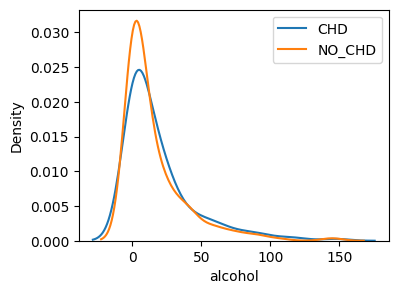

In [12]:
plt.figure(figsize=(4,3))
sn.kdeplot(data = yes_chd, x = 'alcohol', label= 'CHD')
sn.kdeplot(data = no_chd, x = 'alcohol', label= 'NO_CHD')
plt.legend()

In [13]:
yes_chd.alcohol.mean()

19.145249999999997

In [14]:
no_chd.alcohol.mean()

15.931357615894042

**Null Hypothesis** : High alcohol cunsumption does no effect on chd i.e people who consume alcohol and the people don't cunsume tobacco both are having chd
- H0: alcohol_chd = alcohol_no_chd

**Alternative Hypothesis** : High alcohol cunsumption does effect on chd i.e people who consume alcohol have high chances of having chd than the people who doesn't cumsume alcohol
- H1: alcohol_chd != alcohol_no_chd

In [15]:
stats.ttest_ind(yes_chd['alcohol'],
                no_chd['alcohol'])

Ttest_indResult(statistic=1.3437633510233433, pvalue=0.1796873576620041)

- **Conclusion**  : As p value is greater than alpha value (0.05) so we will not reject the Null Hypothesis (HO)


### Analysing Family history
###### Categorical Variable

In [16]:
yes_famhist = chd_df[chd_df.famhist == 'Present']
yes_famhist.shape

(192, 10)

In [17]:
yes_famhist.chd.value_counts(normalize=True)*100

chd
1    50.0
0    50.0
Name: proportion, dtype: float64

In [18]:
no_famhist = chd_df[chd_df.famhist == 'Absent']
no_famhist.shape

(270, 10)

In [19]:
no_famhist.chd.value_counts(normalize=True)*100

chd
0    76.296296
1    23.703704
Name: proportion, dtype: float64

### Chi-square Distribution
Chi-square test is a hypothesis tests to verify whether the observed frequency in the data is same as expected frequency.


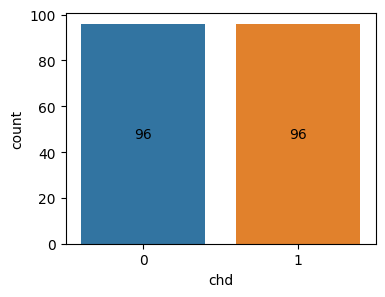

In [20]:
plt.figure(figsize=(4,3))
ax = sn.countplot(data = yes_famhist,
                    x = 'chd');
ax.bar_label(ax.containers[0], label_type='center');


In [21]:
ob_freq = [96,96]
ob_freq

[96, 96]

In [22]:
exp_freq =[20, 172]

In [23]:
stats.chisquare(f_obs=ob_freq,
                f_exp=exp_freq)

Power_divergenceResult(statistic=322.3813953488372, pvalue=4.387202569048211e-72)

- **Conclusion**  : As p value is very less than alpha value (0.05) so we will reject the Null Hypothesis (HO)